<a href="https://colab.research.google.com/github/mike-jansen/misinformation-analysis-capstone/blob/main/liar_liwc_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
import numpy as np

#Liar LIWC Analysis

In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/data/research/liar_dataset/LIWC-22 Results - liar - LIWC Analysis.csv'
df = pd.read_csv(file_path)
df = df.rename(columns={df.columns[2]: 'text'}).reset_index(drop=True)
df = df.rename(columns={df.columns[1]: 'label'}).reset_index(drop=True)

liar_scores = df.loc[:, ['text', 'label', 'Analytic', 'Authentic', 'BigWords', 'ppron']]
liar_scores_true = liar_scores[liar_scores['label'] == 'true']
liar_scores_false = liar_scores[liar_scores['label'] == 'false']

In [ ]:
# Calculate the mean and median for each category in each DataFrame
true_means = liar_scores_true.mean()
false_means = liar_scores_false.mean()
true_medians = liar_scores_true.median()
false_medians = liar_scores_false.median()

# Create a list of the category names
categories = ['Analytic', 'Authentic', 'BigWords', 'ppron']

# Create lists of the true and false means and medians for each category
true_means_list = [true_means[category] for category in categories]
false_means_list = [false_means[category] for category in categories]
true_medians_list = [true_medians[category] for category in categories]
false_medians_list = [false_medians[category] for category in categories]


<ipython-input-4-249f9153261a>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  true_means = liar_scores_true.mean()
<ipython-input-4-249f9153261a>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  false_means = liar_scores_false.mean()
<ipython-input-4-249f9153261a>:4: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence th

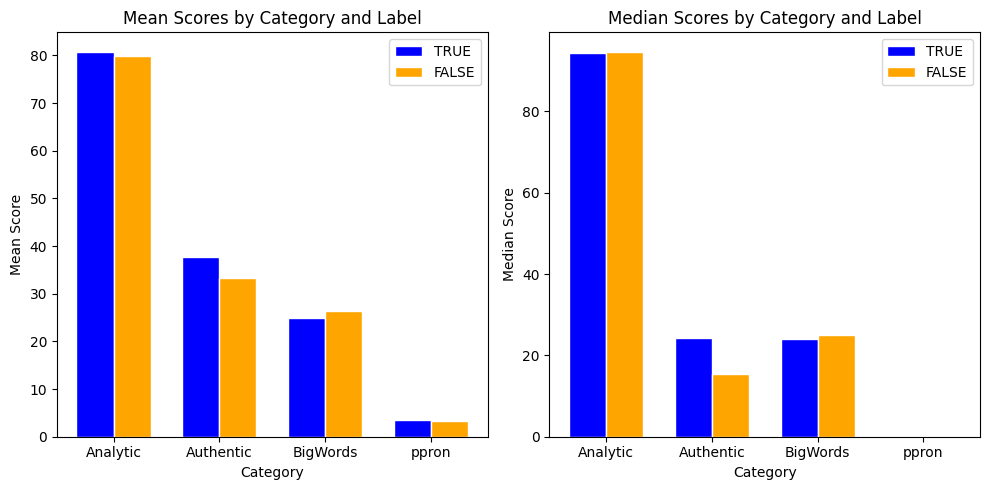

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

# Set the bar width
bar_width = 0.35

# Plot the mean bar graph in the first subplot
r1 = range(len(categories))
r2 = [x + bar_width for x in r1]
ax1.bar(r1, true_means_list, color='blue', width=bar_width, edgecolor='white', label='TRUE')
ax1.bar(r2, false_means_list, color='orange', width=bar_width, edgecolor='white', label='FALSE')
ax1.set_xlabel('Category')
ax1.set_ylabel('Mean Score')
ax1.set_xticks([r + bar_width/2 for r in range(len(categories))])
ax1.set_xticklabels(categories)
ax1.set_title('Mean Scores by Category and Label')
ax1.legend()

# Plot the median bar graph in the second subplot
r1 = range(len(categories))
r2 = [x + bar_width for x in r1]
ax2.bar(r1, true_medians_list, color='blue', width=bar_width, edgecolor='white', label='TRUE')
ax2.bar(r2, false_medians_list, color='orange', width=bar_width, edgecolor='white', label='FALSE')
ax2.set_xlabel('Category')
ax2.set_ylabel('Median Score')
ax2.set_xticks([r + bar_width/2 for r in range(len(categories))])
ax2.set_xticklabels(categories)
ax2.set_title('Median Scores by Category and Label')
ax2.legend()

# Adjust the spacing between subplots and display the figure
fig.tight_layout()
plt.show()

In [ ]:
df.shape

(10239, 133)